In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
 # Load the dataset
 data = pd.read_csv('C:\\Users\\punit\\Downloads\\Supermart Grocery Sales - Retail Analytics Dataset.csv')
 # Display the first few rows of the dataset
 print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [5]:
# Check for missing values
print(data.isnull().sum())
# Drop any rows with missing values
data.dropna(inplace=True)
# Check for duplicates
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed', errors='coerce')


In [11]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [13]:
 # Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Order Month'])
# Display the first few rows after encoding
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  Month  
0   1254      0.12  401.28      0          8           11        2017     10  
1    749      0.18  149.80      0          8           11        2017     10  
2   2360      0.21  165.20      0         12            6        2017      5  
3    896      0.25   89.60      0         11           10        2016      9  
4   2355      0.26  918.45      0         11           10        2016      9  


C:\Users\punit\AppData\Local\Temp\ipykernel_784\4192213373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


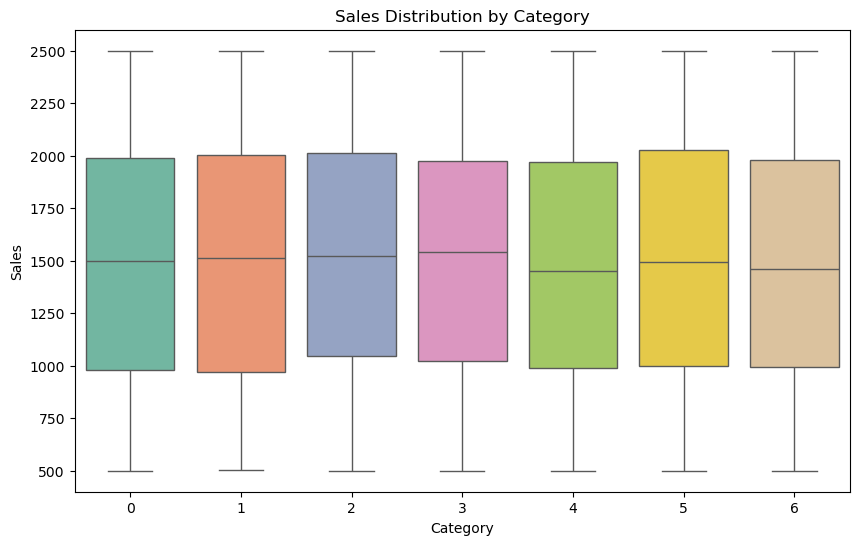

In [15]:
 plt.figure(figsize=(10, 6))
 sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
 plt.title('Sales Distribution by Category')
 plt.xlabel('Category')
 plt.ylabel('Sales')
 plt.show()

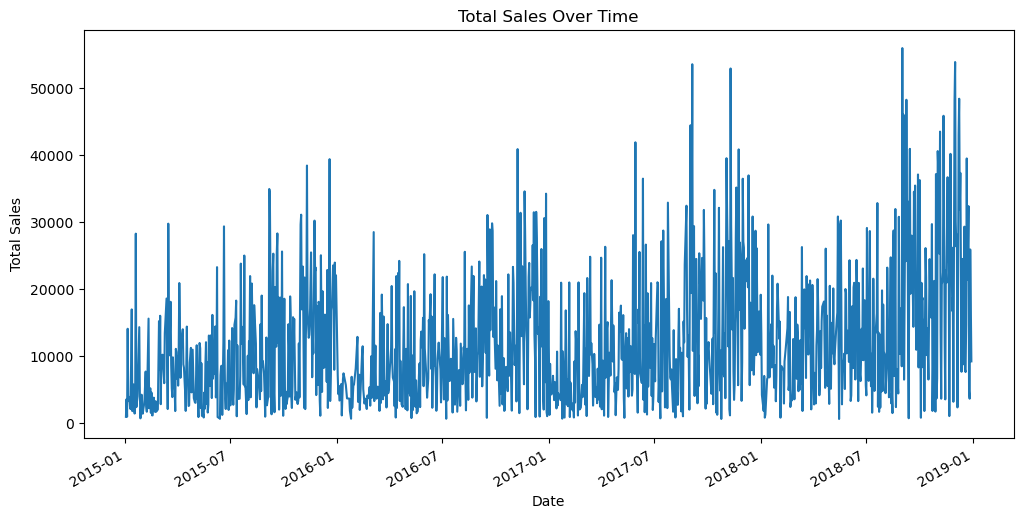

In [17]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

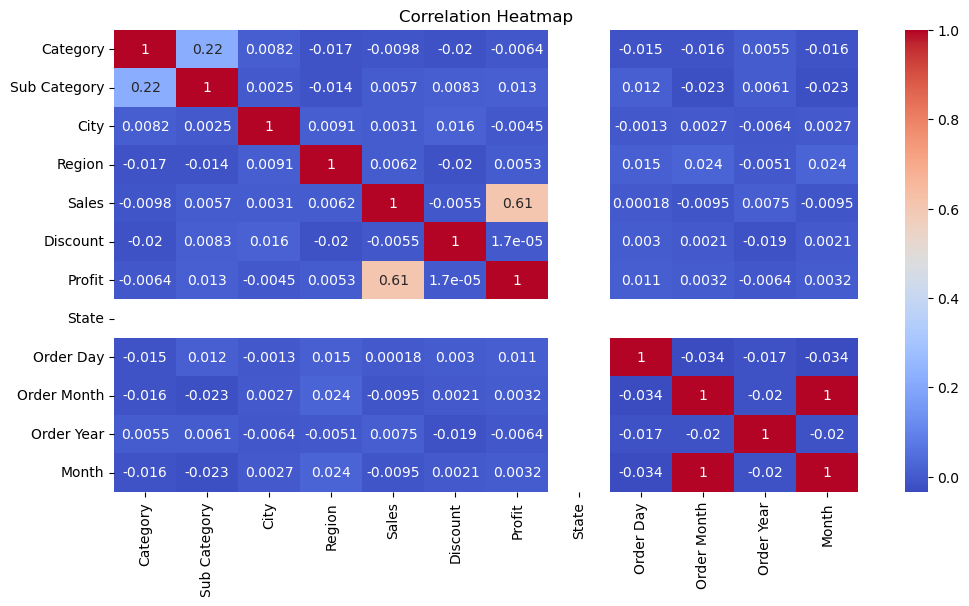

In [19]:
plt.figure(figsize=(12, 6))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation on numeric columns
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
 # Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name','Order Date', 'Sales', 'Month'])
target = data['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
 # Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [25]:
 # Calculate MSE and R-squared
 mse = mean_squared_error(y_test, y_pred)
 r2 = r2_score(y_test, y_pred)
 print(f'Mean Squared Error: {mse}')
 print(f'R-squared: {r2}')

Mean Squared Error: 212954.08313440107
R-squared: 0.3543257711757313


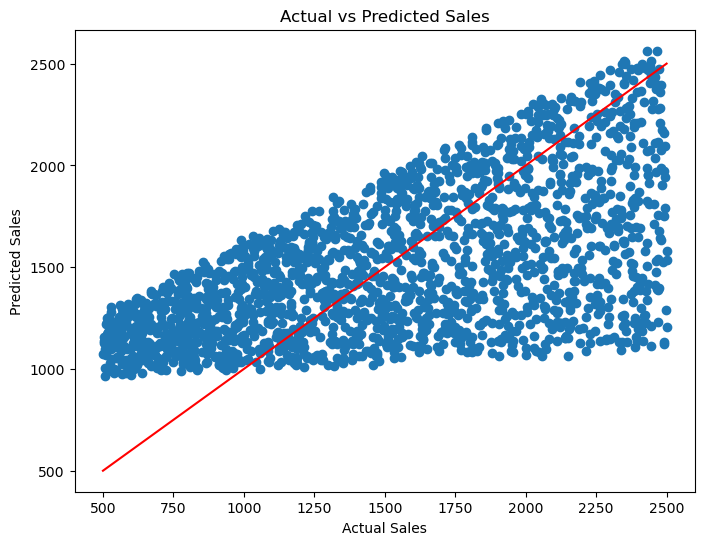

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [29]:
 import os
for dirname, _, filenames in os.walk('Downloads/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
df=pd.read_csv('C:\\Users\\punit\\Downloads\\Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [33]:
 df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [35]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [37]:
 df ['Order Date'] = pd.to_datetime (df ['Order Date'],errors='ignore')

C:\Users\punit\AppData\Local\Temp\ipykernel_784\407466275.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df ['Order Date'] = pd.to_datetime (df ['Order Date'],errors='ignore')


In [39]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [41]:
da=df.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,06-09-2015,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,06-09-2015,West,1903,0.13,437.69,Tamil Nadu


In [43]:
Sales_category=df.groupby("Category")["Sales"].sum()

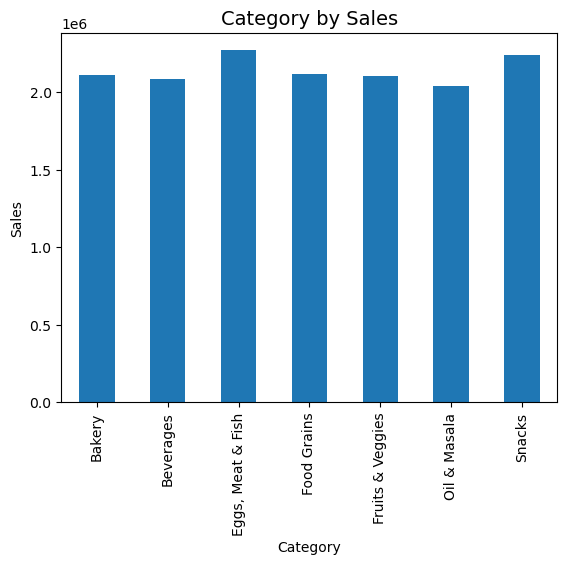

In [45]:
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [47]:
# Create a new datetime column (don't overwrite original)
df['Order_Date_dt'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Now extract month_no, Month name, and year from this new datetime column
df['month_no'] = df['Order_Date_dt'].dt.month
df['Month'] = df['Order_Date_dt'].dt.strftime('%B')
df['year'] = df['Order_Date_dt'].dt.year


In [49]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order_Date_dt,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,2017-11-08,11.0,November,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,2017-11-08,11.0,November,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,2017-06-12,6.0,June,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,2016-10-11,10.0,October,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,2016-10-11,10.0,October,2016.0


In [51]:
monthly_sales=df.groupby('Month')['Sales'].sum().reset_index()

In [53]:
monthly_sales_sorted=monthly_sales.sort_values(by='Month')

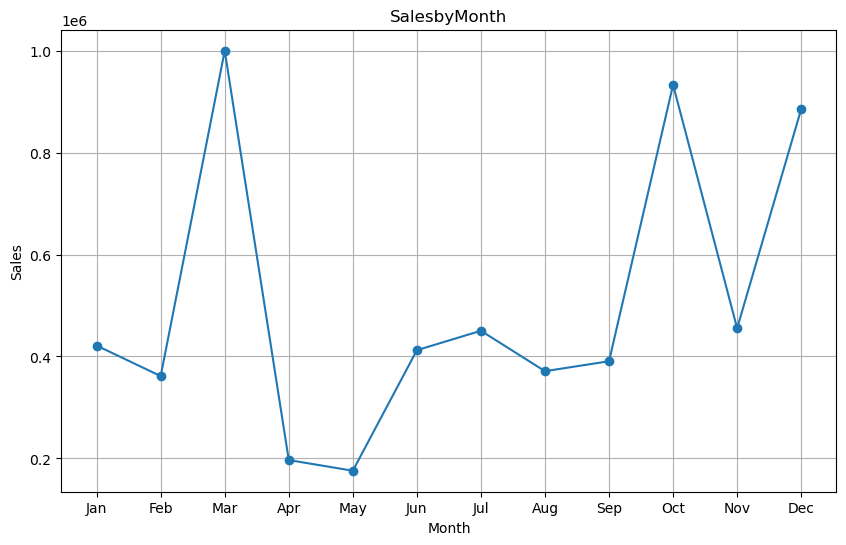

In [55]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'],marker='o')
plt.title('SalesbyMonth')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

In [57]:
Yearly_Sales=df.groupby("year")["Sales"].sum()

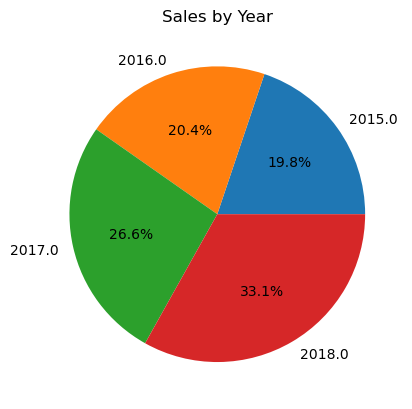

In [59]:
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,
autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

In [61]:
city_sales = df[['City', 'Sales']]

In [63]:
total_sales = city_sales.groupby('City').sum()

In [65]:
sorted_cities = total_sales.sort_values(by='Sales',ascending=False)

In [67]:
top_cities = sorted_cities.head(5)

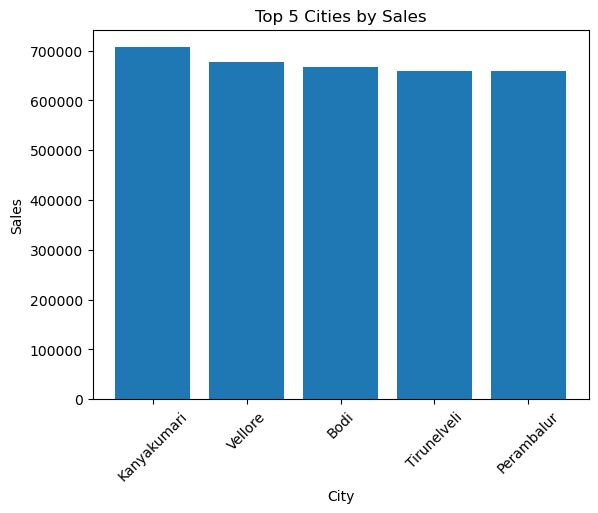

In [69]:
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()

In [1]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.4 MB/s eta 0:01:50
   ---------------------------------------- 0.2/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 0.7/150.0 MB 6.2 MB/s eta 0:00:25
   ---------------------------------------- 1.5/150.0 MB 9.6 MB/s eta 0:00:16
    --------------------------------------- 2.8/150.0 MB 13.7 MB/s eta 0:00:11
   - -------------------------------------- 4.1/150.0 MB 16.5 MB/s eta 0:00:09
   - -------------------------------------- 5.6/150.0 MB 19.0 MB/s eta 0:00:08
   - -------------------------------------- 7.1/150.0 MB 20.7 MB/s eta 0:00:07
   -- ------------------------------------- 8.5/150.0 MB 21.8 MB/s eta 0:00:07
   -- ------------------------------------- 9.3/150.0 MB 21.3 MB/s eta 0:00:07
   -- ------------------------------------- 10.4/150.0 MB 23.4 MB/s eta 0:00:06
   --- ------------------------------------ 11.8/150.0 MB 26.2 

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_encode = ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']

for col in cols_to_encode:
    data[col] = le.fit_transform(data[col])


In [75]:
# Drop columns not needed for modeling
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])

# Target
target = data['Sales']


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
# 1. Import required libraries
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 3. Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("🔸 Random Forest Results:")
print("MSE:", rf_mse)
print("R² Score:", rf_r2)

# 4. Train XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# 5. Evaluate XGBoost
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print("\n🔸 XGBoost Results:")
print("MSE:", xgb_mse)
print("R² Score:", xgb_r2)


🔸 Random Forest Results:
MSE: 218649.01691780888
R² Score: 0.3370588001710645

🔸 XGBoost Results:
MSE: 248458.45632891514
R² Score: 0.24667693700057813


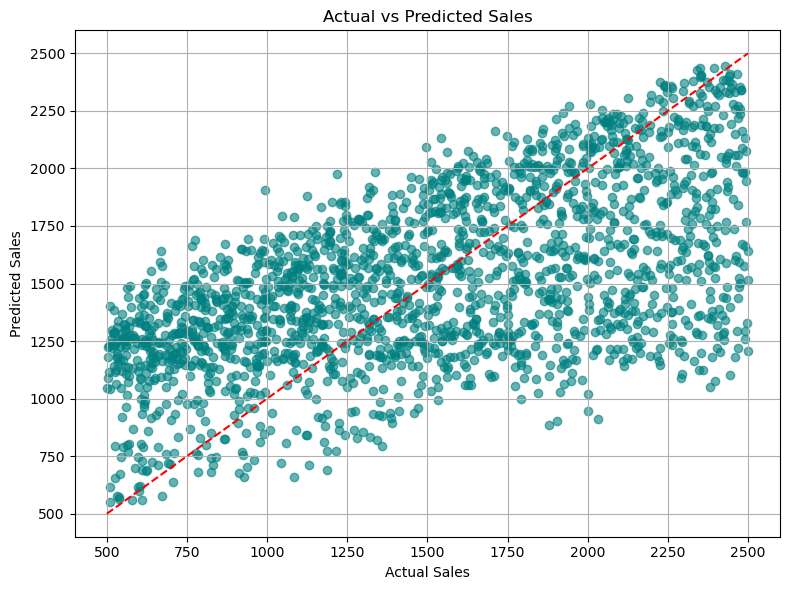

In [81]:
import matplotlib.pyplot as plt

# Use predictions from your best model (replace y_pred accordingly)
# Example for Random Forest:
y_pred = rf_preds  # or xgb_preds if using XGBoost

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


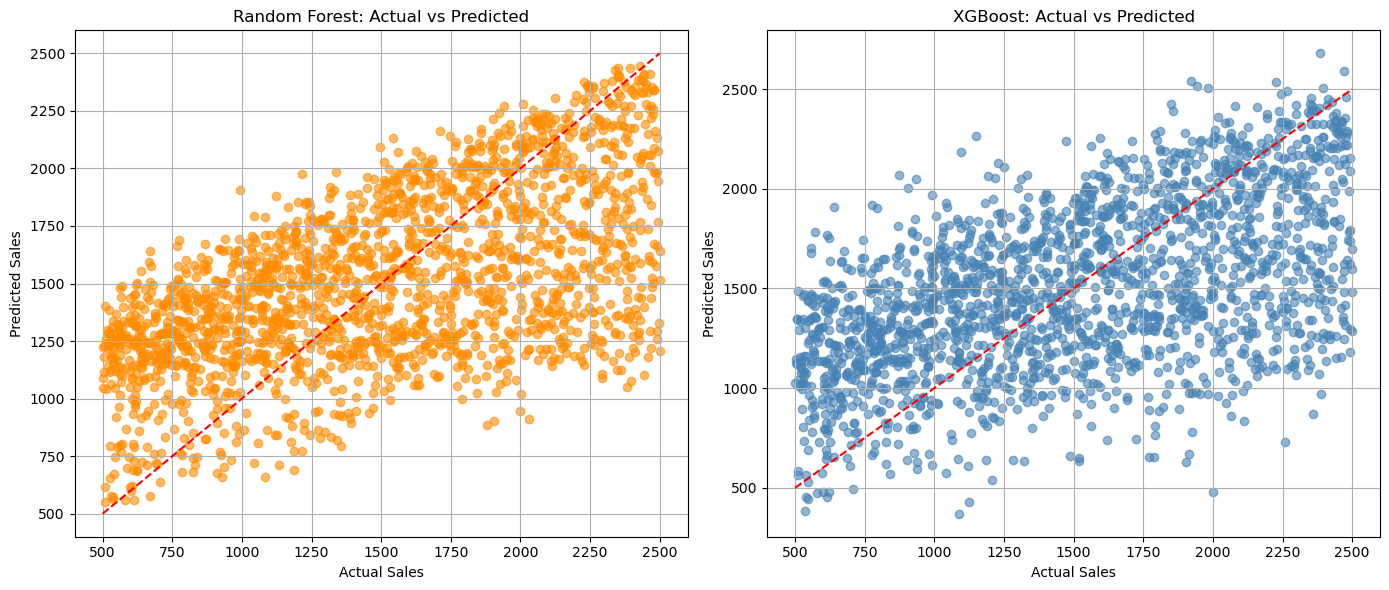

In [83]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest Plot
axes[0].scatter(y_test, rf_preds, alpha=0.6, color='darkorange')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_title('Random Forest: Actual vs Predicted')
axes[0].set_xlabel('Actual Sales')
axes[0].set_ylabel('Predicted Sales')
axes[0].grid(True)

# XGBoost Plot
axes[1].scatter(y_test, xgb_preds, alpha=0.6, color='steelblue')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[1].set_title('XGBoost: Actual vs Predicted')
axes[1].set_xlabel('Actual Sales')
axes[1].set_ylabel('Predicted Sales')
axes[1].grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='r2',
                           n_jobs=-1,  # use all cores
                           verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Parameters:", grid_search.best_params_)

# Best score
print("📊 Best R² Score from Cross-Validation:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
📊 Best R² Score from Cross-Validation: 0.3667228191255232


In [86]:
# Train final model with best parameters
best_rf = grid_search.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

print("🎯 Final R² Score:", r2_score(y_test, y_pred_rf_best))
print("📉 Final MSE:", mean_squared_error(y_test, y_pred_rf_best))


🎯 Final R² Score: 0.3591659927801887
📉 Final MSE: 211357.69766951818


In [89]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on CV:", grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nTuned Random Forest Performance on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score on CV: 0.36483480981418115

Tuned Random Forest Performance on Test Set:
RMSE: 459.41
R-squared: 0.36


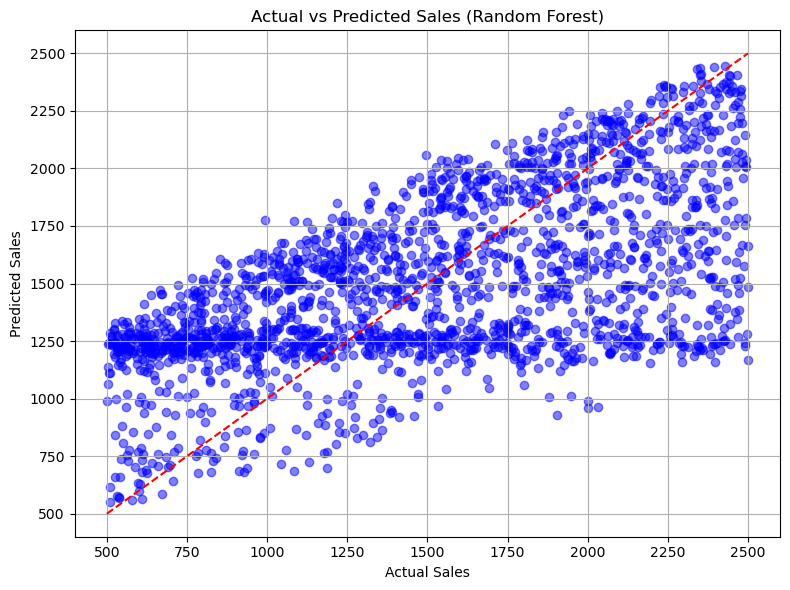

In [92]:
import matplotlib.pyplot as plt

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

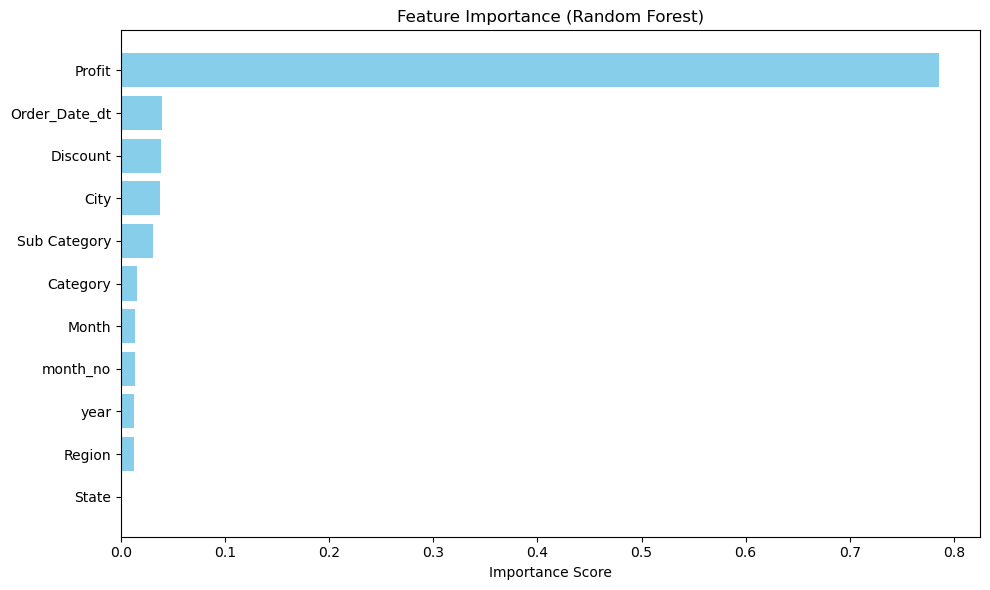

In [97]:
# Rebuild features if needed
# Drop target and unnecessary columns
X = df.drop(columns=['Sales', 'Order ID', 'Customer Name', 'Order Date'], errors='ignore')

# Feature importance from best model (Random Forest)
importances = best_model.feature_importances_
feature_names = X.columns

# Create DataFrame and plot
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
